[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/juliopez/Taller-Fundamentos-Data-Science-Python/blob/main/03_Notebooks/04_Sesion_04.ipynb)

<img src=https://upload.wikimedia.org/wikipedia/commons/1/19/UDLA-logo-oficial.jpg width=400/>

# Fundamentos de Data Science con Python
**Dr. Julio Lopez-Nunez (2025)**

## **Sesión 4 – Introducción a Deep Learning**  
**Duración total estimada:** 120 min  

## ⏱️ Introducción y objetivos (15 min)

**Objetivos de la sesión**
- Redes neuronales artificiales
- Capas, neuronas y funciones de activación
- Forward pass, error y entrenamiento (backpropagation)
- Función de pérdida y accuracy
- Diferencia entre train y test (generalización / overfitting)

> En esta sesion utilizaremos el dataset **MNIST**, que contiene imágenes de dígitos escritos a mano (0–9).

## ¿Cuántas capas y cuántas neuronas usar?

### 1. ¿Cuántas capas ocultas usar?
- **Problemas simples (tabulares)** → 1 capa oculta  
- **Problemas más complejos** → 2–4 capas  
- **Problemas muy complejos (imágenes, texto, audio)** → muchas capas  

Más capas = más capacidad, pero **mayor riesgo de overfitting**.

---

### 2. ¿Cuántas neuronas por capa?
- Primera capa: **entre 2× y 3× el número de entradas**  
- Siguientes capas: **igual o menos neuronas**  
- Capa de salida:  
  - **1 neurona** si es regresión  
  - **n neuronas** si es clasificación  

Más neuronas = más flexibilidad, pero también **más riesgo de memorizar el ruido**.

---

### 3. ¿Por qué usamos ReLU?
- Introduce no linealidad  
- Permite aprender curvas complejas  
- Es rápida y estable para entrenamiento

---


## Underfitting & Overfitting

En este notebook se presentan **tres redes neuronales**, diseñadas para:

### 🔹 Modelo 1: **Lineal (sin capa oculta)**
- No tiene activación → equivalente a regresión lineal  
- No puede aprender relaciones no lineales  
- Ilustra **underfitting** extremo  

*sin activación la red no aprende la curva*.

---

### 🔹 Modelo 2: **Red pequeña (1 capa oculta, pocas neuronas)**
- Una capa oculta para problemas simples tabulares  
- Neuronas suficientes para aprender la forma general  
- Buen equilibrio entre bias y varianza  

Representa un **modelo razonable** para este tipo de datos.

---

### 🔹 Modelo 3: **Red grande (varias capas ocultas + muchas neuronas)**
- Aumentamos significativamente la capacidad del modelo  
- Puede ajustarse demasiado al ruido del conjunto de entrenamiento  
- Ilustra el **overfitting**  

Ademas, es posible observar diferencias claras entre **train** y **test**.

---


## Recordatorio

Entradas ───► [ Capa oculta 1 ] ───► [ Capa oculta 2 ] ───► ... ───► [ Salida ]

- Más capas → más capacidad → riesgo de overfitting
- Más neuronas → mayor flexibilidad → riesgo de memorizar el ruido
- Sin activación → la red es equivalente a regresión lineal

## ⏱️ Actividad práctica (50–60 min)

In [1]:
# PASO 1
import numpy as np
import matplotlib.pyplot as plt
# Cargamos el dataset MNIST desde Keras.
from tensorflow.keras.datasets import mnist
# Este dataset contiene 70.000 imágenes de dígitos escritos a mano (0–9),
# cada una en escala de grises y tamaño 28x28 píxeles.
# Es ideal para entender cómo una red neuronal aprende representaciones visuales.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Importamos las herramientas básicas para construir nuestra red neuronal.
# Sequential: Modelo lineal de capas, perfecto para una MLP simple.
# Dense: Capa "completamente conectada", el componente principal de un MLP.
# Flatten: Transformará la imagen 28x28 en un vector de 784 valores antes de
# pasarla a las capas densas (las capas densas no trabajan con imágenes en 2D).
from tensorflow.keras.utils import to_categorical
# to_categorical: Convierte etiquetas como 0,1,2,...9 en vectores "one-hot".
# Esto es necesario cuando trabajamos con clasificación multiclase
# y usaremos la activación softmax en la capa de salida.

In [2]:
# PASO 2
# Cargar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train y x_test contienen las imágenes (28x28 píxeles, escala de grises).
# y_train y y_test contienen las etiquetas (los dígitos de 0 a 9).

print("Forma de x_train:", x_train.shape) # Significa: 60.000 imágenes, cada una de tamaño 28x28.
print("Forma de y_train:", y_train.shape) # Son 60.000 etiquetas, una por imagen.
print("Forma de x_test:", x_test.shape) # Separa datos para evaluación.
print("Valores posibles de las etiquetas:", np.unique(y_train))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Forma de x_train: (60000, 28, 28)
Forma de y_train: (60000,)
Forma de x_test: (10000, 28, 28)
Valores posibles de las etiquetas: [0 1 2 3 4 5 6 7 8 9]


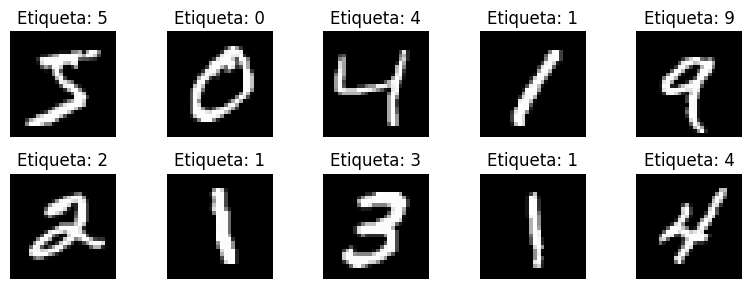

In [3]:
# Mostrar algunas imágenes de ejemplo
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [4]:
# PASO 3
# Normalizar: pasar de [0, 255] a [0, 1]
# Dividir por 255.0 convierte cada píxel a un valor flotante entre 0 y 1.
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Convertir etiquetas a one-hot encoding
# Este formato permite que la red interprete cada salida como una probabilidad
# para cada una de las 10 clases.
num_clases = 10
y_train_cat = to_categorical(y_train, num_clases)
y_test_cat  = to_categorical(y_test, num_clases)

print("Nueva forma de x_train:", x_train.shape)
print("Nueva forma de y_train_cat:", y_train_cat.shape)


Nueva forma de x_train: (60000, 28, 28)
Nueva forma de y_train_cat: (60000, 10)


In [5]:
# PASO 4
# Definir Red Neuronal
# Usamos un modelo Sequential, ideal cuando las capas se apilan una tras otra
# sin ramificaciones complejas. Ejemplo clásico de una MLP.
model = Sequential([
    # Capa que "aplana" la imagen 28x28 a un vector de 784
    # Las capas densas (Dense) solo aceptan vectores 1D.
    # Flatten convierte cada imagen 28x28 en un vector de 784 valores.
    # Este vector será la entrada de la red neuronal.
    Flatten(input_shape=(28, 28)),

    # Capa oculta: neuronas densamente conectadas
    # Tiene 128 neuronas densamente conectadas (cada neurona recibe las 784 entradas).
    Dense(128, activation="relu"),  # función de activación ReLU

    # Capa de salida: 10 neuronas (una por dígito), activación softmax
    # Necesitamos 10 neuronas: una por cada clase (0–9).
    # Que significa softmax
    # - Convierte la salida en un vector de probabilidades que suman 1.
    # - Ideal para tareas de clasificación multiclase.
    Dense(num_clases, activation="softmax")
])

model.summary()
# NOTA:
# Este modelo tiene 101.770 parámetros entrenables.
# Cada parámetro es un peso o un sesgo que se actualizará durante el entrenamiento.
# Este número refleja la "capacidad" de la red. Un modelo con demasiados parámetros
# puede memorizar los datos (overfitting), mientras que uno con muy pocos puede
# no capturar patrones importantes (underfitting).

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# PASO 5
# Compilar el Modelo
model.compile(
    optimizer="adam", # Adam ajusta automáticamente la tasa de aprendizaje ('learning rate')
    loss="categorical_crossentropy",  # Esta función mide qué tan lejos están las predicciones de las etiquetas reales (clasificación multiclase)
    metrics=["accuracy"] # Accuracy = proporción de predicciones correctas.
    # Durante el entrenamiento veremos cómo el accuracy sube y la pérdida baja.
)

In [7]:
# PASO 6
# Entrenar el Modelo
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=32, # batch_size = número de muestras que se procesan juntas antes de actualizar los pesos.
                   # Un tamaño de 32 es un estándar muy utilizado.
    validation_split=0.2,   # validation_split = 20% del x_train se usa como validación.
                            # Esto permite medir si el modelo está generalizando o está memorizando.
    verbose=1 # verbose = 1 no es mas que mostrar el progreso del entrenamiento en pantalla.
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8667 - loss: 0.4781 - val_accuracy: 0.9592 - val_loss: 0.1488
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9611 - loss: 0.1364 - val_accuracy: 0.9647 - val_loss: 0.1176
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9750 - loss: 0.0866 - val_accuracy: 0.9681 - val_loss: 0.1055
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9804 - loss: 0.0648 - val_accuracy: 0.9732 - val_loss: 0.0910
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9857 - loss: 0.0476 - val_accuracy: 0.9734 - val_loss: 0.0896
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9891 - loss: 0.0354 - val_accuracy: 0.9746 - val_loss: 0.0893
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9914 - loss: 0.0298 - val_accuracy: 0.9747 - val_loss: 0.0870
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9931 - loss: 0.0232 - 

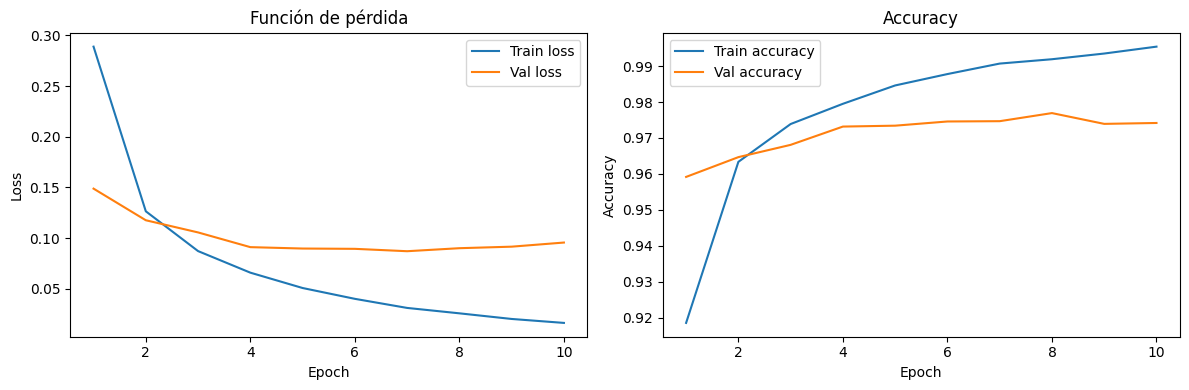

In [8]:
# PASO 7
# Graficar la pérdida (loss) y accuracy

# Historial de entrenamiento
hist = history.history

epochs = range(1, len(hist["loss"]) + 1)

plt.figure(figsize=(12, 4))

# Gráfico de pérdida
# El modelo está aprendiendo sin memorizar. (IMAGEN EN EL RESULTADO DE ESTA CELDA)
# La pérdida en validación se mantiene baja y estable, lo que indica buen equilibrio
# entre aprendizaje y generalización.
plt.subplot(1, 2, 1)
plt.plot(epochs, hist["loss"], label="Train loss")
plt.plot(epochs, hist["val_loss"], label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Función de pérdida")
plt.legend()

# Gráfico de accuracy
# La red predice correctamente más del 97% de las imágenes que nunca había visto durante el entrenamiento (VAL).
# La diferencia entre accuracy de entrenamiento y de validación es pequeña (el modelo no está sobreajustando).
plt.subplot(1, 2, 2)
plt.plot(epochs, hist["accuracy"], label="Train accuracy")
plt.plot(epochs, hist["val_accuracy"], label="Val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# PASO 8
# Evaluar en el conjunto de prueba (test)
# Hasta ahora el modelo solo ha sido evaluado con:
#   - datos de entrenamiento (train)
#   - datos de validación (val)
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Loss en test: {test_loss:.4f}")
print(f"Accuracy en test: {test_acc:.4f}")

Loss en test: 0.0838
Accuracy en test: 0.9769


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


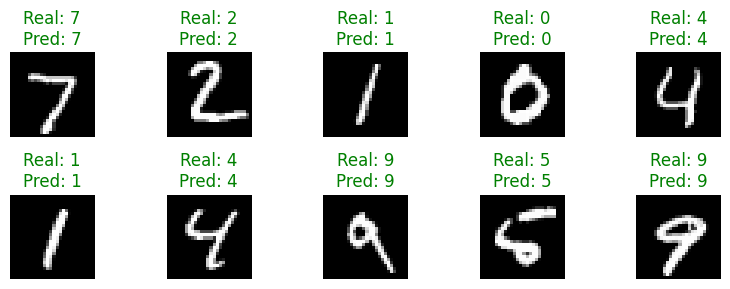

In [10]:
# PASO 9
# Obtener predicciones
pred_probs = model.predict(x_test)
pred_labels = np.argmax(pred_probs, axis=1) #    np.argmax selecciona la clase con mayor probabilidad.

# Mostrar algunas imágenes con su predicción
num_imagenes = 10
plt.figure(figsize=(8, 3))
for i in range(num_imagenes):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap="gray")
    plt.axis("off")
    true_label = y_test[i]
    pred_label = pred_labels[i]
    color = "green" if true_label == pred_label else "red"
    plt.title(f"Real: {true_label}\nPred: {pred_label}", color=color)

plt.tight_layout()
plt.show()

## ⏱️ Reflexión Final
¿Qué entendemos ahora por “aprendizaje”?

¿Por qué decimos que el proceso es “casi artesanal”?

# Glosario de conceptos usados en este notebook

### Librerías y objetos principales

- **`numpy (np)`**  
  Biblioteca para trabajar con arreglos y operaciones numéricas.  
  Aquí se usa para manejar vectores/matrices y funciones como `np.unique`, `np.argmax`.

- **`matplotlib.pyplot (plt)`**  
  Biblioteca para crear gráficos.  
  Se usa para mostrar imágenes de MNIST y graficar loss/accuracy durante el entrenamiento.

- **`mnist.load_data()`**  
  Función de Keras que descarga y carga el dataset MNIST.  
  Devuelve cuatro conjuntos: `x_train`, `y_train`, `x_test`, `y_test`.

- **`Sequential`**  
  Tipo de modelo en Keras donde las capas se apilan una tras otra en forma lineal.  
  Ideal para redes simples como la MLP usada en este notebook.

- **`Dense`**  
  Capa densamente conectada (cada neurona recibe todas las entradas de la capa anterior).  
  Es el bloque básico de una red neuronal multicapa (MLP).

- **`Flatten`**  
  Capa que “aplana” una matriz (ej. 28×28 píxeles) en un vector 1D (784 valores).  
  Permite usar imágenes como entrada de capas `Dense`.

- **`to_categorical`**  
  Convierte etiquetas numéricas (0–9) a vectores one-hot, por ejemplo:  
  `3 → [0,0,0,1,0,0,0,0,0,0]`.  
  Necesario para usar `softmax + categorical_crossentropy`.

---

### Preparación de datos

- **Normalización (`/ 255.0`)**  
  Escalar los píxeles de [0,255] a [0,1].  
  Ayuda a que el entrenamiento sea más estable y rápido.

- **One-hot encoding**  
  Representar clases como vectores de 0 y 1, con un único 1 indicando la clase correcta.  
  Usado en clasificación multiclase.

- **`num_clases`**  
  Número de categorías posibles.  
  En MNIST: 10 (dígitos del 0 al 9).

---

### Construcción del modelo

- **Capa de entrada**  
  Recibe los datos originales (aquí, 784 píxeles después de `Flatten`).

- **Capa oculta**  
  Capa intermedia con neuronas y activación no lineal (`Dense(128, activation="relu")`).  
  Es donde la red aprende representaciones internas/patrones.

- **Capa de salida**  
  Última capa de la red.  
  Aquí tiene 10 neuronas con `activation="softmax"` (una por cada dígito).

- **`activation="relu"`**  
  Función de activación ReLU.  
  Devuelve `0` si la entrada es negativa, y el mismo valor si es positiva.  
  Se usa en capas ocultas para introducir no linealidad.

- **`activation="softmax"`**  
  Función de activación que convierte las salidas en probabilidades que suman 1.  
  Se usa en la capa de salida de problemas de clasificación multiclase.

---

### Compilación y entrenamiento

- **`model.compile(...)`**  
  Paso donde se define cómo entrenará el modelo:  
  - optimizador  
  - función de pérdida  
  - métricas a monitorear.

- **`optimizer="adam"`**  
  Variante avanzada del Descenso del Gradiente que ajusta automáticamente la tasa de aprendizaje.  
  Es el optimizador por defecto en muchos modelos de Deep Learning.

- **`loss="categorical_crossentropy"`**  
  Función de pérdida usada en clasificación multiclase con etiquetas one-hot.  
  Mide qué tan diferentes son las probabilidades predichas respecto a las verdaderas.

- **`metrics=["accuracy"]`**  
  Métrica que mide el porcentaje de predicciones correctas.

- **`model.fit(...)`**  
  Función que entrena el modelo.  
  Actualiza los pesos usando backpropagation a lo largo de varias epochs.

- **Epoch**  
  Una pasada completa por todos los datos de entrenamiento.

- **`batch_size`**  
  Número de ejemplos que se procesan antes de actualizar los pesos.  
  Aquí: 32 imágenes por actualización.

- **`validation_split`**  
  Porcentaje de los datos de entrenamiento reservado para validación interna.  
  Sirve para monitorear generalización y detectar overfitting.

- **`verbose`**  
  Controla cuánta información se muestra en pantalla.  
  - `0`: sin salida  
  - `1`: barra de progreso  
  - `2`: una línea por epoch.

- **`history`**  
  Objeto que guarda el registro del entrenamiento (loss, accuracy, val_loss, val_accuracy por epoch).

---

### Evaluación y predicción

- **`model.evaluate(x_test, y_test_cat)`**  
  Calcula la pérdida y las métricas (ej. accuracy) en el conjunto de prueba.

- **`model.predict(x_test)`**  
  Devuelve las probabilidades predichas para cada clase y cada imagen de test.

- **`np.argmax(pred_probs, axis=1)`**  
  Toma la clase con mayor probabilidad (la “predicción final” del modelo).

---

### Conceptos de aprendizaje automático

- **Función de pérdida (loss)**  
  Mide el error del modelo. El entrenamiento busca minimizarla.

- **Accuracy**  
  Porcentaje de predicciones correctas sobre el total de ejemplos.

- **Overfitting**  
  Cuando el modelo aprende demasiado bien los datos de entrenamiento, pero falla al generalizar.  
  Señal típica: train accuracy muy alto y val/test accuracy bastante menor.

- **Underfitting**  
  Cuando el modelo es demasiado simple y no logra capturar los patrones de los datos.  
  Señal típica: accuracies bajos tanto en train como en validación.

- **Generalización**  
  Capacidad del modelo para funcionar bien con datos nuevos, no vistos durante el entrenamiento.
